# 3 easy to implement Python performance tips

https://hackernoon.com/3-easy-ways-to-improve-performance-of-your-python-code-dw183uzo

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%load_ext line_profiler
%load_ext cython

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The cython extension is already loaded. To reload it, use:
  %reload_ext cython


# 1. Benchmark!!

In [29]:
def sum_of_lists(ls):
    '''Calculates the sum of an input list of lists'''
    
    s = 0
    for l in ls:
        for val in l:
            s += val
            
    return s

#create a list of lists
smallrange = list(range(10000))
inlist = [smallrange, smallrange, smallrange, smallrange]

In [30]:
#now run the sum_of_lists function benchmark
%lprun -f sum_of_lists sum_of_lists(inlist) 

In [31]:
#benchmark the execution
%timeit sum_of_lists(inlist) 

1.53 ms ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# 2. Avoid loops when possible

In [5]:
def sum_of_lists_map(ls):
    '''Calculates the sum of an input list of lists'''

    return(sum(list(map(sum,ls))))


#create a list of lists
smallrange = list(range(10000))
inlist = [smallrange,smallrange,smallrange,smallrange]

In [6]:
#benchmark the execution
%timeit sum_of_lists_map(inlist) 

189 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


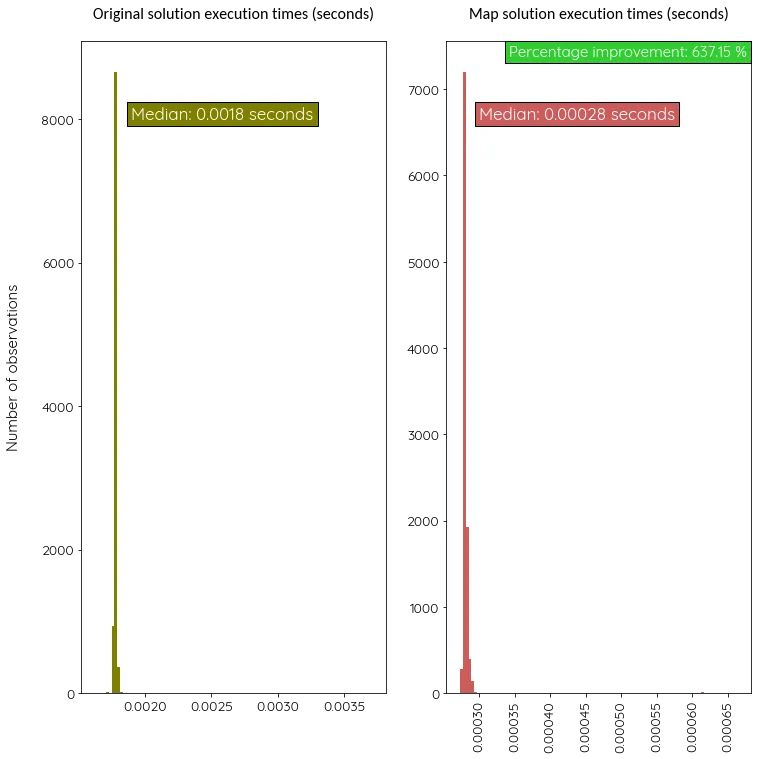

In [7]:
from IPython.display import Image
Image(filename='map.jpeg')

# 3. Cythonize

In [11]:
%%cython
def sum_of_lists_cython(ls):
    '''Calculates the sum of an input list of lists'''
    
    s = 0
    for l in ls:
        for val in l:
            s += val
            
    return s

In [12]:
%timeit sum_of_lists_cython(inlist) 

835 µs ± 21.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


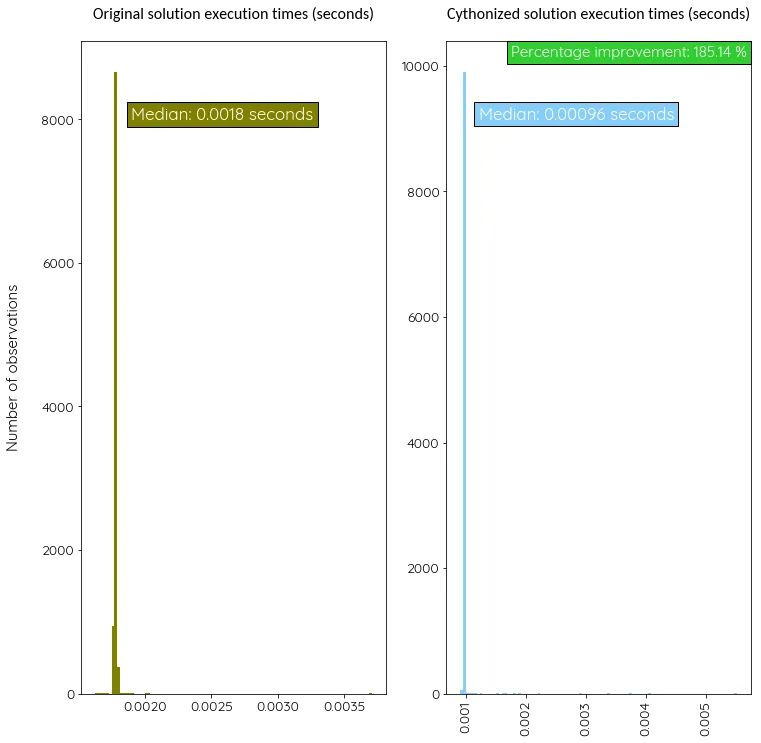

In [13]:
from IPython.display import Image
Image(filename='cython.jpeg')

## Cython can do a lot better than this

In [36]:
%%cython

from libcpp.vector cimport vector

cdef sum_of_lists_pure_cython(ls):
    '''Calculates the sum of an input list of lists'''
    
    cdef unsigned int s = 0
    
    for l in ls:
        for val in l:
            s += val
            
    return s

In [40]:
%%cython -a
    
cdef unsigned int s = 0
cdef 

for l in ls:
    for val in l:
        s += val




Error compiling Cython file:
------------------------------------------------------------
...
    
cdef unsigned int s = 0

for l in ls:
        ^
------------------------------------------------------------

/home/bkotis/.cache/ipython/cython/_cython_magic_b5b1b5af19706e058ac326f22281dd6e.pyx:4:9: undeclared name not builtin: ls


In [37]:
sum_of_lists_pure_cython(inlist) 

199980000

In [33]:
%timeit sum_of_lists_pure_cython(inlist) 

1.3 ms ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
